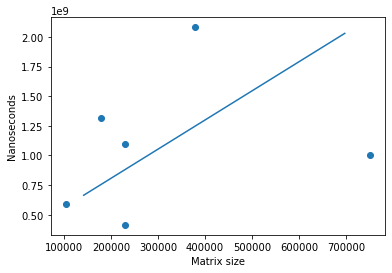

Mean squared error: 44254167033731360.00
Coefficient of determination: 0.88


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('DataMM.csv', sep = ";") # Meer data verzamelen

x = df.loc[:, "Matrix Size M":"Cache hit ratio"] # Betere feature selection
y = df.loc[:, "Time spent"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = lm().fit(x_train, y_train)
predictions = model.predict(x_test)

train_sizes = x_train["Matrix Size M"] * x_train["Matrix Size P"]
test_sizes = x_test["Matrix Size M"] * x_test["Matrix Size P"]

plt.scatter(train_sizes, y_train)
plt.plot(test_sizes, predictions)
plt.xlabel("Matrix size")
plt.ylabel("Nanoseconds")

plt.show()

print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions)) # Toelichting bij deze getallen
print("Coefficient of determination: %.2f" % r2_score(y_test, predictions)) # Toelichting bij deze getallen